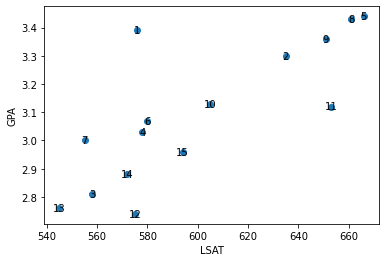

In [12]:
import pandas as pd

# Load the data
law = pd.read_csv('law.csv')
# Plot the data using matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(law['LSAT'], law['GPA'])
for i, txt in enumerate(law['observation']):
    ax.annotate(txt, (law['LSAT'][i], law['GPA'][i]), ha='center', va='center')
ax.set_xlabel('LSAT')
ax.set_ylabel('GPA')
plt.show()


#####  The nonparametric bootstrap distribution of the Pearson’s correlation coefficient between LSAT and GPA using B = 40000 bootstrap samples (lab exercise)

In [10]:
import numpy as np
import pandas as pd

# Load the data
law = pd.read_csv('law.csv')

# Compute the observed correlation coefficient
obs_corr = law['LSAT'].corr(law['GPA'])dd

# Set the number of bootstrap samples
B = 40000

# Create an empty array to store the bootstrap samples
bootstrap_corr = np.zeros(B)

# Generate B bootstrap samples
for i in range(B):
    # Sample with replacement from the data
    bootstrap_sample = law.sample(n=len(law), replace=True)
    # Compute the correlation coefficient of the bootstrap sample
    bootstrap_corr[i] = bootstrap_sample['LSAT'].corr(bootstrap_sample['GPA'])

# Compute the bootstrap standard error and 95% confidence interval
se_boot = np.std(bootstrap_corr)
lower_ci_boot = np.percentile(bootstrap_corr, 2.5)
upper_ci_boot = np.percentile(bootstrap_corr, 97.5)

# Print the results
print("Observed correlation coefficient: {:.3f}".format(obs_corr))
print("Bootstrap standard error: {:.3f}".format(se_boot))
print("95% Confidence interval: ({:.3f}, {:.3f})".format(lower_ci_boot, upper_ci_boot))


Observed correlation coefficient: 0.776
Bootstrap standard error: 0.133
95% Confidence interval: (0.460, 0.962)


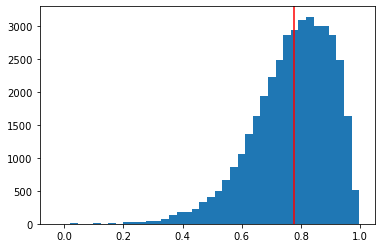

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load data into pandas DataFrame
law = pd.read_csv("law.csv")

# Calculate Pearson's correlation coefficient
theta_hat = np.corrcoef(law['LSAT'], law['GPA'])[0, 1]

# Define bootstrap function
def boot():
    n = len(law)
    ind = np.random.choice(n, n, replace=True)
    return np.corrcoef(law.iloc[ind]['LSAT'], law.iloc[ind]['GPA'])[0, 1]

# Run bootstrap
B = 40000
theta_star = np.array([boot() for i in range(B)])

# Plot results
plt.hist(theta_star, bins=40)
plt.axvline(x=theta_hat, color='r', linewidth=1.5)
plt.show()
